In [54]:
import yfinance as yf
import pandas as pd

In [55]:
import mplfinance as fplt
import talib # pip install TA-Lib

print("TA-Lib Version : {}".format(talib.__version__))
print("MPLFinance Version : {}".format(fplt.__version__))

TA-Lib Version : 0.4.28
MPLFinance Version : 0.12.10b0


In [56]:
# Example usage
symbols = {
            "AMD": (20, "$"),
            "AMZN": (28, "€"),
            "ARM": (30, "$"),
            "ASML": (10, "$"),
            "BSI.MU": (51, "€"),
            "BTC-USD": (0.025, "$"),
            "CRM": (7, "$"),
            "DDOG": (7, "$"),
            "ETH-USD": (0.493, "$"),
            "KLAC": (3, "$"),
            "MDB": (5, "$"),
            "META": (5, "$"),
            "MSFT": (6, "$"),
            "NVDA": (13, "$"),
            "ISRG": (3, "$"),
            "QCOM": (20, "$"),
            "RDC.DE": (10, "€"),
            "RHM.DE": (5, "€"),
            "SAAB-B.ST": (19, "SEK"),
            "SHL.DE": (19, "€"),
            "SMCI": (6, "$"),
            "TSFA.F": (17, "$"),
            "DTE.DE": (0, "€"),
            "^GSPC": (0, "$"),
           }
df = yf.download(list(symbols.keys()), period="1y")

[*********************100%%**********************]  24 of 24 completed


In [57]:
for symbol in symbols:
    df["SMA50", symbol] = df["Adj Close", symbol].rolling(50).mean()
    df["SMA200", symbol] = df["Adj Close", symbol].rolling(200).mean()
    # df["RSI", symbol] = talib.RSI(df["Adj Close", symbol], timeperiod=3)
    df["EMA", symbol] = df["Adj Close", symbol].ewm(span=50, adjust=False).mean()
    df["Adj Daily Return", symbol] = df["Adj Close", symbol].pct_change()
    df["Cum Adj Daily Return", symbol] = df["Adj Daily Return", symbol].cumsum()

/tmp/ipykernel_1776192/305460361.py:6: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/tmp/ipykernel_1776192/305460361.py:6: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/tmp/ipykernel_1776192/305460361.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_1776192/305460361.py:6: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the r

In [58]:
df.head(1)

Price      Adj Close                                                      \
Ticker           AMD AMZN ARM ASML    BSI.MU BTC-USD CRM DDOG     DTE.DE   
Date                                                                       
2023-02-16       NaN  NaN NaN  NaN  66.81456     NaN NaN  NaN  19.896698   

Price               ...  SMA50 SMA200        EMA Adj Daily Return  \
Ticker     ETH-USD  ... DTE.DE DTE.DE     DTE.DE           DTE.DE   
Date                ...                                             
2023-02-16     NaN  ...    NaN    NaN  19.896698              NaN   

Price      Cum Adj Daily Return SMA50 SMA200   EMA Adj Daily Return  \
Ticker                   DTE.DE ^GSPC  ^GSPC ^GSPC            ^GSPC   
Date                                                                  
2023-02-16                  NaN   NaN    NaN   NaN              NaN   

Price      Cum Adj Daily Return  
Ticker                    ^GSPC  
Date                             
2023-02-16                  NaN  

[1 rows x 264 columns]

In [59]:
round(df["Adj Daily Return"].iloc[-2] * 100, 2)

Ticker
AMD          0.00
AMZN         0.00
ARM          0.00
ASML         0.00
BSI.MU       0.00
BTC-USD     -0.95
CRM          0.00
DDOG         0.00
ETH-USD     -0.61
KLAC         0.00
MDB          0.00
META         0.00
MSFT         0.00
NVDA         0.00
ISRG         0.00
QCOM         0.00
RDC.DE       0.00
RHM.DE       0.00
SAAB-B.ST    0.00
SHL.DE       0.00
SMCI         0.00
TSFA.F       0.00
DTE.DE       0.00
^GSPC        0.00
Name: 2024-02-17 00:00:00, dtype: float64

In [60]:
sek_factor = yf.download("SEK=X", period="1d").iloc[-1]["Adj Close"]
euro_factor = yf.download("EURUSD=X", period="1d").iloc[-1]["Adj Close"]

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


In [61]:
sek_factor

10.437000274658203

In [62]:
euro_factor

1.0773887634277344

In [63]:
for day in df.index:
    if not day.weekday() < 5:
        continue
    total_portfolio_value = 0
    for ticker, (amount_shares, currency) in symbols.items():
        last_price = df["Adj Close", ticker].loc[day]
        if pd.isna(last_price):
            last_price = 0
        if currency == "€":
            last_price /= euro_factor
        if currency == "SEK":
            last_price /= sek_factor
        # print(ticker, " $ value: ", round(amount_shares * last_price))
        # print(ticker, "€:", amount_shares * last_price / euro_factor)
        total_portfolio_value += amount_shares * last_price 
        df.loc[day, "Total Portfolio Value"] = total_portfolio_value
    #print("Total $: ", total_portfolio_value)
print("Total €", round(total_portfolio_value / euro_factor))


/tmp/ipykernel_1776192/1555031946.py:16: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Total € 64456


In [64]:
df = df[df["Total Portfolio Value"] > 30000]

<AxesSubplot:xlabel='Date'>

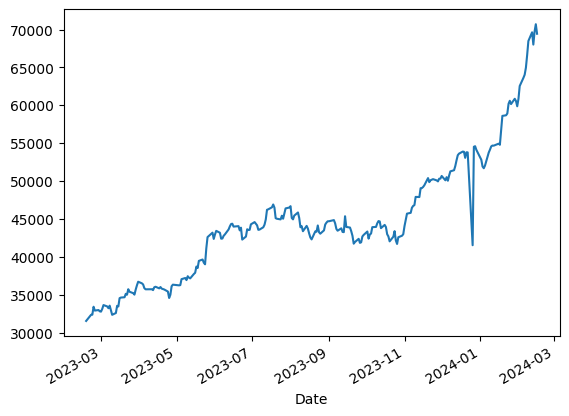

In [65]:
df["Total Portfolio Value"].plot()

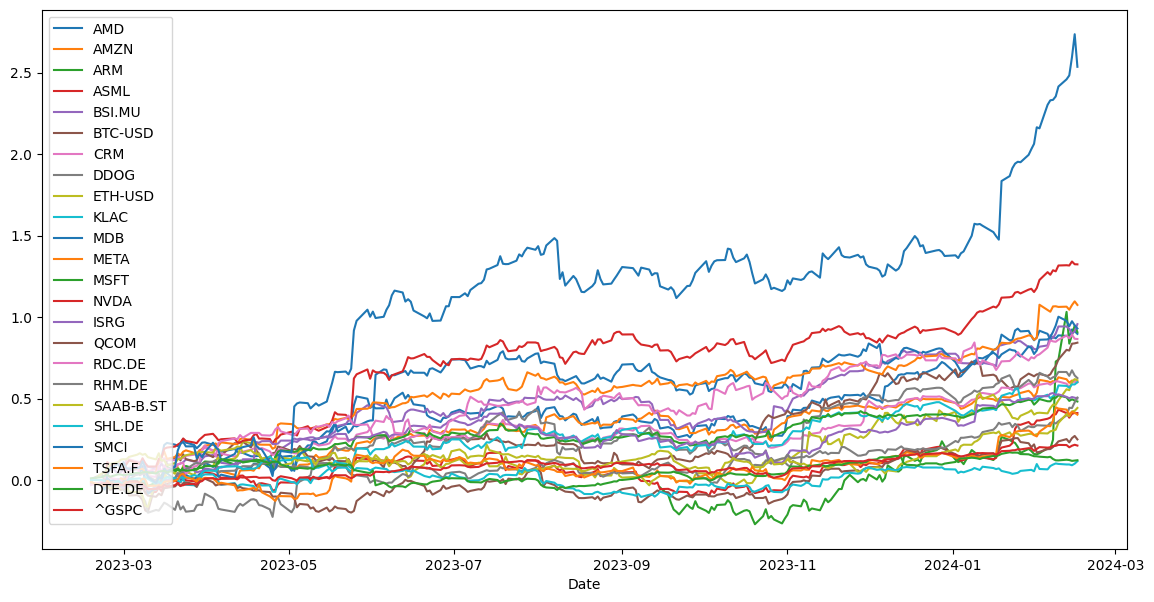

In [66]:
from matplotlib import pyplot as plt
plt.figure(figsize=(14,7))
plt.plot(df['Cum Adj Daily Return'])
plt.xlabel('Date')
plt.legend(symbols)
plt.show()

In [67]:
import plotly.graph_objects as go
import plotly.express as px
from datetime import datetime, timedelta

for i in range(1, 5):
    # Calculate the date i weeks ago
    three_months_ago = datetime.today() - timedelta(days=i*7)
    # Convert the date to a string in the desired format
    date_string = three_months_ago.strftime("%Y-%m-%d")
    tmp = df[df.index >= date_string].copy()

    for symbol in symbols:
        tmp["Cum Adj Daily Return", symbol] = tmp["Adj Daily Return", symbol].cumsum()

    # Create a scatter plot
    fig = px.line(tmp['Cum Adj Daily Return'], title=f"week {i}")
    # Show the plot
    fig.show()

In [72]:
import plotly.graph_objects as go
import plotly.express as px
from datetime import datetime, timedelta

for i in range(1, int(200/7), 4):
    # Calculate the date i weeks ago
    three_months_ago = datetime.today() - timedelta(days=i*7)
    # Convert the date to a string in the desired format
    date_string = three_months_ago.strftime("%Y-%m-%d")
    tmp = df[df.index >= date_string].copy()

    for symbol in symbols:
        tmp["Cum Adj Daily Return", symbol] = (tmp["Adj Daily Return", symbol] - tmp["Adj Daily Return", "^GSPC"]).cumsum()

    # Create a scatter plot
    fig = px.line(tmp['Cum Adj Daily Return'], title=f"week {i}")
    # Show the plot
    fig.show()


In [69]:
import plotly.graph_objects as go
import plotly.express as px
from datetime import datetime, timedelta

for i in range(1, 30, 3):
    # Calculate the date i months ago
    three_months_ago = datetime.today() - timedelta(days=i*30)
    # Convert the date to a string in the desired format
    date_string = three_months_ago.strftime("%Y-%m-%d")
    tmp = df[df.index >= date_string].copy()

    for symbol in symbols:
        tmp["Cum Adj Daily Return", symbol] = (tmp["Adj Daily Return", symbol] - tmp["Adj Daily Return", "^GSPC"]).cumsum()

    # Create a scatter plot
    fig = px.line(tmp['Cum Adj Daily Return'], title=f"month {i}")
    # Show the plot
    fig.show()


In [70]:
import itertools
import string

ticker_letters = string.ascii_uppercase

def foo(l):
     yield from itertools.product(*([l] * 3)) 

for x in foo(ticker_letters):
     # print(''.join(x))
     pass

In [71]:
msft = yf.Ticker("MSFT")

# get all stock info
msft.info

# get historical market data
hist = msft.history(period="1mo")

# show meta information about the history (requires history() to be called first)
msft.history_metadata

# show actions (dividends, splits, capital gains)
msft.actions
msft.dividends
msft.splits
msft.capital_gains  # only for mutual funds & etfs

# show share count
msft.get_shares_full(start="2022-01-01", end=None)

# show financials:
# - income statement
msft.income_stmt
msft.quarterly_income_stmt
# - balance sheet
msft.balance_sheet
msft.quarterly_balance_sheet
# - cash flow statement
msft.cashflow
msft.quarterly_cashflow
# see `Ticker.get_income_stmt()` for more options

# show holders
msft.major_holders
msft.institutional_holders
msft.mutualfund_holders
msft.insider_transactions
msft.insider_purchases
msft.insider_roster_holders

# show recommendations
msft.recommendations
msft.recommendations_summary
msft.upgrades_downgrades

# Show future and historic earnings dates, returns at most next 4 quarters and last 8 quarters by default. 
# Note: If more are needed use msft.get_earnings_dates(limit=XX) with increased limit argument.
msft.earnings_dates

# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
msft.isin

# show options expirations
msft.options

# show news
msft.news

# get option chain for specific expiration
opt = msft.option_chain('YYYY-MM-DD')

ValueError: Expiration `YYYY-MM-DD` cannot be found. Available expirations are: [2024-02-23, 2024-03-01, 2024-03-08, 2024-03-15, 2024-03-22, 2024-03-28, 2024-04-19, 2024-05-17, 2024-06-21, 2024-07-19, 2024-08-16, 2024-09-20, 2024-10-18, 2024-11-15, 2024-12-20, 2025-01-17, 2025-06-20, 2025-12-19, 2026-01-16, 2026-06-18, 2026-12-18]

In [ ]:
msft.earnings_dates